In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns

#plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

instapouf = pd.read_csv("../../../gruiickcode/python/04-plot/data/instapouf.csv", sep=",")
#
#instapouf.head()
instapouf.describe()

,abo
count,225.000000
mean,2558.595556
std,1561.745381
min,245.000000
25%,1214.000000
50%,2235.000000
75%,3676.000000
max,5846.000000


In [2]:
#instapouf.shape
instapouf.shape[0]

225

In [3]:
instapouf.size

450

le plot simple donne une série aligné sur l'index, pas sur la valeur réelle de date. Deux essais en extrayant l'axe de la date pour le reformater :


Text(99.59722222222221, 0.5, 'Followers')

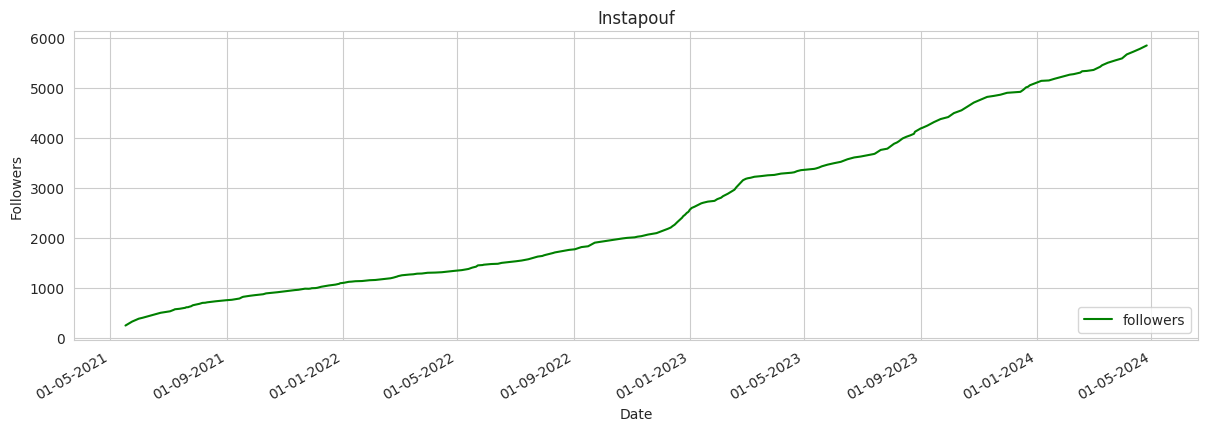

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

data = pd.read_csv('../../../gruiickcode/python/04-plot/data/instapouf.csv')
data['date'] = pd.to_datetime(data['date'])
#data.sort_values('date', inplace=True)

plt.subplots(figsize=(12,4))
#plt.plot_date(data['date'], data['abo'], label='abo', linestyle='solid', marker=None)
plt.plot_date(data['date'], data['abo'], label='followers', fmt='-g')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.legend(loc=4, fontsize=10)
plt.title('Instapouf')
plt.xlabel('Date')
plt.ylabel('Followers')


In [5]:
# date la plus proche:
def nearest(items, pivot):
    """ items: where to find, pivot: what to find """
    return min(items, key=lambda x: abs(x - pivot))

# another way (pandas):
# df.iloc[df.index.get_loc(datetime.datetime(2016,2,2),method='nearest')]
# EN FAIT, Y'A PAS BESOIN !
# faut travailler en valeur d'index : today == last, puis -7, -30, -365...

NameError: name 'df' is not defined

In [6]:
# FIXME / TODO
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import dates as mpl_dates
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

data = pd.read_csv('../../../gruiickcode/python/04-plot/data/instapouf.csv')
data['date'] = pd.to_datetime(data['date'])
#data.sort_values('date', inplace=True)

val_last = data.iloc[-1]
val_sept = data.iloc[-7]
val_trente = data.iloc[-30]
medium = int(data.shape[0] / 2)
val_medium = data.iloc[medium]

taux7 = ((val_last['abo'] - val_sept['abo']) / val_sept['abo']) * 100
taux30 = ((val_last['abo'] - val_trente['abo']) / val_trente['abo']) * 100
tauxmed = ((val_last['abo'] - val_medium['abo']) / val_medium['abo']) * 100

print(f"{val_last['abo']}, {val_sept['abo']}, {taux7:0.0f} %")
print(f"{val_last['abo']}, {val_trente['abo']}, {taux30:0.0f} %")
print(f"{val_last['abo']}, {val_medium['abo']}, {tauxmed:0.0f} %")


"""
plt.subplots(figsize=(12,4))
#plt.plot_date(data['date'], data['abo'], label='abo', linestyle='solid', marker=None)
plt.plot_date(data['date'], data['abo'], label='followers', fmt='-g')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.legend(loc=4, fontsize=10)
plt.title('Instapouf')
plt.xlabel('Date')
plt.ylabel('Followers')
"""

5846, 5536, 6 %
5846, 4861, 20 %
5846, 2235, 162 %


"\nplt.subplots(figsize=(12,4))\n#plt.plot_date(data['date'], data['abo'], label='abo', linestyle='solid', marker=None)\nplt.plot_date(data['date'], data['abo'], label='followers', fmt='-g')\nplt.gcf().autofmt_xdate()\ndate_format = mpl_dates.DateFormatter('%d-%m-%Y')\nplt.gca().xaxis.set_major_formatter(date_format)\nplt.tight_layout()\nplt.legend(loc=4, fontsize=10)\nplt.title('Instapouf')\nplt.xlabel('Date')\nplt.ylabel('Followers')\n"